In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
from sklearn.model_selection import train_test_split

# Data Understanding

Dataset yang digunakan dalam proyek ini merupakan dataset film yang digunakan untuk membangun sistem rekomendasi berdasarkan preferensi pengguna. Dataset ini terdiri dari dua file yaitu movies.csv dan ratings.csv. Pada file movies.csv terdiri dari 3 kolom dengan 9742 baris data. Sedangkan, pada file rating.csv terdiri dari 4 kolom dengan 100836 baris data. Dataset ini diperoleh dari Kaggle melalui tautan berikut: (https://www.kaggle.com/datasets/nicoletacilibiu/movies-and-ratings-for-recommendation-system)

Variabel dalam file movies.csv:
* movieId - ID unik untuk setiap film.
* title - Judul film.
* genres - Genre film (misalnya, aksi, drama, komedi, dll).


Variabel dalam file ratings.csv:
* userId - ID unik untuk setiap pengguna yang memberikan rating.
* movieId - ID film yang diberi rating oleh pengguna.
* rating - Rating yang diberikan oleh pengguna
* timestamp - Waktu ketika rating diberikan.









In [2]:
import pandas as pd

df1 = pd.read_csv('/content/movies.csv')
df2 = pd.read_csv('/content/ratings.csv')
df1

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [3]:
df2

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [5]:
df1.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [7]:
df2.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


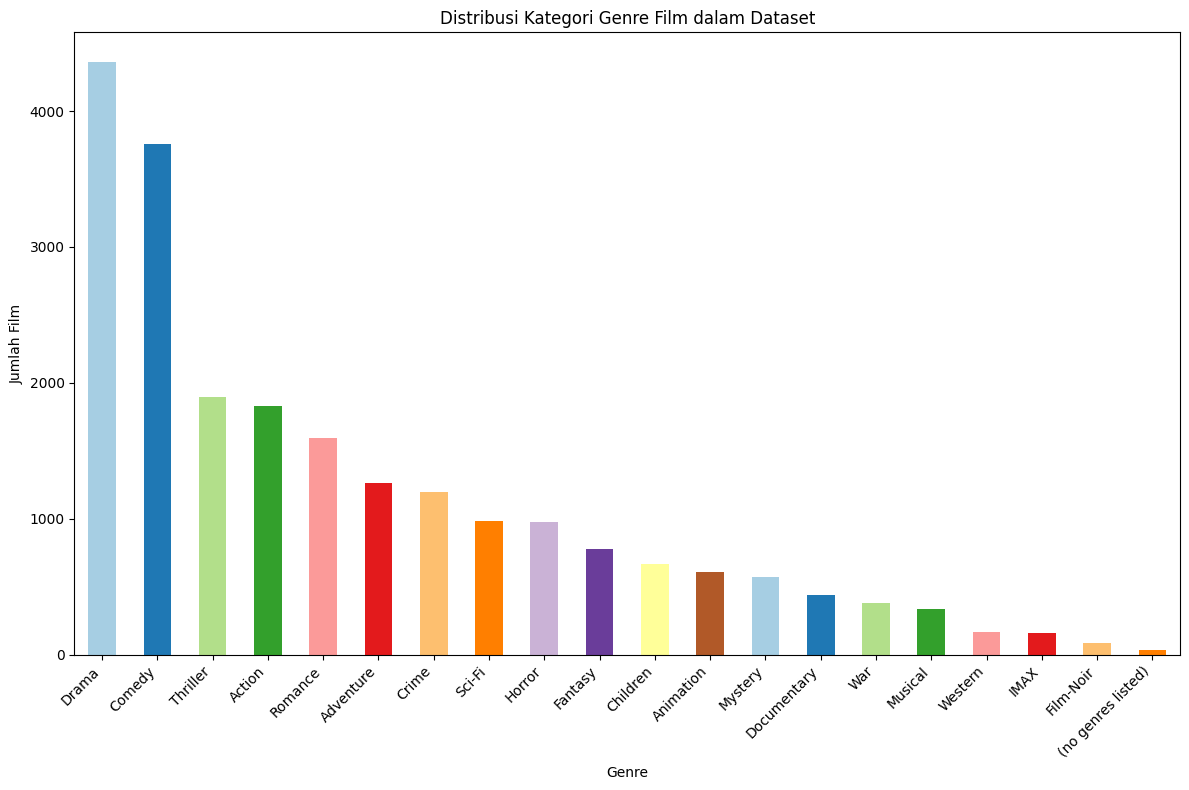

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Memisahkan genre yang digabung dengan "|"
all_genres = df1['genres'].str.split('|').explode()  # Mengubah menjadi satu genre per baris

# Menghitung jumlah kemunculan setiap genre
genre_counts = all_genres.value_counts()

# Visualisasi dengan Diagram Batang
plt.figure(figsize=(12, 8))
genre_counts.plot(kind='bar', color=plt.cm.Paired.colors)
plt.title('Distribusi Kategori Genre Film dalam Dataset')
plt.xlabel('Genre')
plt.ylabel('Jumlah Film')
plt.xticks(rotation=45, ha='right')  # Memiringkan label genre agar lebih mudah dibaca
plt.tight_layout()  # Menyesuaikan layout agar tidak terpotong
plt.show()


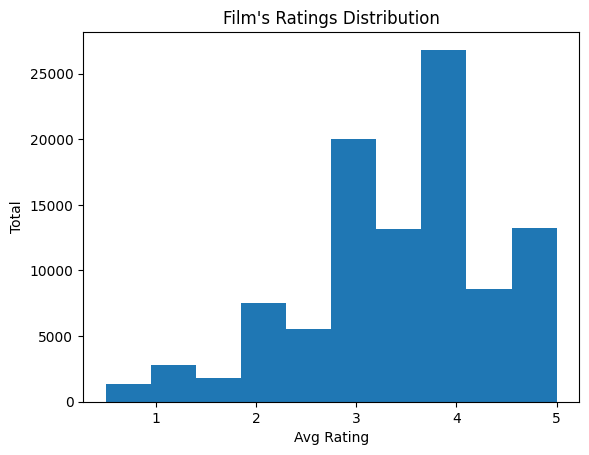

In [11]:
plt.hist(df2.rating)
plt.ylabel('Total')
plt.xlabel('Avg Rating')
plt.title("Film's Ratings Distribution")
plt.show()

In [12]:
df = pd.merge(df2, df1, on='movieId', how='inner')
df

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller
100832,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller
100833,610,168250,5.0,1494273047,Get Out (2017),Horror
100834,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   title      100836 non-null  object 
 5   genres     100836 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 4.6+ MB


In [14]:
df.isnull().sum()

,0
userId,0
movieId,0
rating,0
timestamp,0
title,0
genres,0


In [15]:
# Membuang data duplikat pada variabel preparation
df = df.drop_duplicates('movieId')
df

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
100820,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100821,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100823,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100827,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


In [16]:
# Mengonversi data series ‘placeID’ menjadi dalam bentuk list
movieId = df['movieId'].tolist()

# Mengonversi data series ‘Name’ menjadi dalam bentuk list
title = df['title'].tolist()

# Mengonversi data series ‘Rcuisine’ menjadi dalam bentuk list
genres = df['genres'].tolist()

print(len(movieId))
print(len(title))
print(len(genres))

9724
9724
9724


In [17]:
# Membuat dictionary untuk data ‘movies_id’, ‘title’, dan ‘genres’
movies_new = pd.DataFrame({
    'id': movieId,
    'title': title,
    'genres': genres
})
movies_new

,id,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,6,Heat (1995),Action|Crime|Thriller
3,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...
9719,160341,Bloodmoon (1997),Action|Thriller
9720,160527,Sympathy for the Underdog (1971),Action|Crime|Drama
9721,160836,Hazard (2005),Action|Drama|Thriller
9722,163937,Blair Witch (2016),Horror|Thriller


In [18]:
data = movies_new
data.sample(5)

,id,title,genres
3395,49772,"Painted Veil, The (2006)",Drama|Romance
7844,92198,Seeking Justice (2011),Action|Drama|Thriller
9346,59131,Are You Scared? (2006),Horror
4613,161024,Jim Jefferies: Freedumb (2016),Comedy
6991,2442,Hilary and Jackie (1998),Drama


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
tfid = TfidfVectorizer()
tfid.fit(data['genres'])

tfid.get_feature_names_out()


array(['action', 'adventure', 'animation', 'children', 'comedy', 'crime',
       'documentary', 'drama', 'fantasy', 'fi', 'film', 'genres',
       'horror', 'imax', 'listed', 'musical', 'mystery', 'no', 'noir',
       'romance', 'sci', 'thriller', 'war', 'western'], dtype=object)

In [20]:

tfidf_matrix = tfid.fit_transform(data['genres'])


tfidf_matrix.shape

(9724, 24)

In [21]:
tfidf_matrix.todense()

matrix([[0.        , 0.41681721, 0.51634045, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.54896727, 0.        , 0.        , ..., 0.54222422, 0.        ,
         0.        ],
        ...,
        [0.64123095, 0.        , 0.        , ..., 0.63335461, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.62477687, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [22]:

pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tfid.get_feature_names_out(),
    index=data.title
).sample(24, axis=1).sample(10, axis=0)

,imax,action,fi,genres,documentary,film,thriller,listed,no,drama,...,western,children,fantasy,crime,horror,comedy,war,romance,adventure,sci
title,,,,,,,,,,,,,,,,,,,,,
Pawn (2013),0.0,0.0,0.0,0.0,0.000000,0.0,0.648715,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.761032,0.0,0.000000,0.000000,0.0,0.0,0.0
"Safety of Objects, The (2001)",0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,1.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
Frequency (2000),0.0,0.0,0.0,0.0,0.000000,0.0,0.825381,0.0,0.0,0.564576,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
Joyeux Noël (Merry Christmas) (2005),0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.391837,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.920035,0.0,0.0,0.0
Earthlings (2006),0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
Unknown (2006),0.0,0.0,0.0,0.0,0.000000,0.0,0.528858,0.0,0.0,0.361748,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
The Beguiled (2017),0.0,0.0,0.0,0.0,0.000000,0.0,0.440887,0.0,0.0,0.301575,...,0.845382,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
"20,000 Days on Earth (2014)",0.0,0.0,0.0,0.0,0.654873,0.0,0.000000,0.0,0.0,0.288372,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
"Glass Menagerie, The (1987)",0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,1.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0


In [23]:
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.15262722, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.15262722, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.69543501, 0.33876915,
        0.        ],
       ...,
       [0.        , 0.        , 0.69543501, ..., 1.        , 0.39570531,
        0.        ],
       [0.        , 0.        , 0.33876915, ..., 0.39570531, 1.        ,
        0.78080334],
       [0.        , 0.        , 0.        , ..., 0.        , 0.78080334,
        1.        ]])

In [24]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa judul film
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['title'], columns=data['title'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap film
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (9724, 9724)


title,Dial M for Murder (1954),Shrink (2009),Alvin and the Chipmunks: Chipwrecked (2011),"Goofy Movie, A (1995)",Exorcist: The Beginning (2004)
title,,,,,
Once a Thief (Zong heng si hai) (1991),0.564735,0.000000,0.171283,0.115693,0.314411
Left Behind: The Movie (2000),0.241570,0.349890,0.000000,0.000000,0.319587
Mary Shelley's Frankenstein (Frankenstein) (1994),0.000000,0.301486,0.000000,0.000000,0.430088
G-Force (2009),0.000000,0.000000,0.000000,0.331695,0.000000
Priest (2011),0.182385,0.000000,0.000000,0.000000,0.618137
She's Gotta Have It (1986),0.000000,0.000000,0.262460,0.544625,0.000000
College (1927),0.000000,0.000000,0.460026,0.310726,0.000000
"Nine Lives of Tomas Katz, The (2000)",0.000000,0.408772,0.203401,0.137388,0.000000
"Ant Bully, The (2006)",0.000000,0.000000,0.476216,0.563979,0.000000


In [25]:
def movie_recommendations(nama_movie, similarity_data=cosine_sim_df, items=data[['title', 'genres']], k=10):

    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,nama_movie].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop nama_resto agar nama resto yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama_movie, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [26]:
data[data.title.eq('Dish, The (2001)')]

,id,title,genres
4931,4225,"Dish, The (2001)",Comedy


In [27]:
# Mendapatkan rekomendasi restoran yang mirip dengan KFC
movie_recommendations('Dish, The (2001)')

,title,genres
0,Private Benjamin (1980),Comedy
1,Napoleon Dynamite (2004),Comedy
2,Monty Python Live at the Hollywood Bowl (1982),Comedy
3,Withnail & I (1987),Comedy
4,Fraktus (2012),Comedy
5,"Oh, God! You Devil (1984)",Comedy
6,Eddie Izzard: Dress to Kill (1999),Comedy
7,Gotcha! (1985),Comedy
8,Just One of the Guys (1985),Comedy
9,"Seducing Doctor Lewis (Grande séduction, La) (...",Comedy


In [28]:
def precision_at_k(recommended_movies, target_movie, items, k=10):

    target_genres = set(items.loc[items['title'] == target_movie, 'genres'].iloc[0].split('|'))
    recommended_genres = items.loc[items['title'].isin(recommended_movies), 'genres'].apply(lambda x: set(x.split('|')))

    relevancy_count = recommended_genres.apply(lambda x: len(target_genres.intersection(x)) > 0).sum()
    return relevancy_count / k

# Contoh penggunaan
movie_name = "Dish, The (2001)"
recommended_df = movie_recommendations(movie_name, cosine_sim_df, data, k=10)
recommended_movies = recommended_df['title'].tolist()

precision_k = precision_at_k(recommended_movies, movie_name, data, k=10)
print(f'Precision: {precision_k:.2f}')


Precision: 1.00


## Collaborative Filtering

In [29]:
df

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
100820,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100821,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100823,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100827,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


In [30]:
# Mengubah userID menjadi list tanpa nilai yang sama
user_ids = df['userId'].unique().tolist()
print('list userId: ', user_ids)

# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userId : ', user_to_user_encoded)

# Melakukan proses encoding angka ke ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userId: ', user_encoded_to_user)

list userId:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 36, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 50, 51, 52, 53, 55, 57, 58, 59, 60, 62, 63, 64, 66, 67, 68, 69, 70, 72, 73, 74, 75, 76, 78, 79, 80, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 95, 96, 97, 98, 100, 101, 103, 104, 105, 106, 108, 109, 110, 111, 113, 114, 115, 116, 117, 119, 122, 123, 125, 128, 129, 131, 132, 135, 136, 137, 138, 139, 140, 143, 144, 148, 149, 151, 153, 154, 155, 156, 157, 158, 160, 161, 163, 164, 165, 167, 168, 169, 171, 175, 177, 178, 179, 181, 182, 183, 184, 185, 186, 187, 188, 191, 193, 195, 197, 198, 199, 200, 202, 204, 205, 209, 210, 212, 213, 214, 215, 216, 217, 219, 220, 221, 222, 223, 224, 225, 226, 227, 230, 232, 233, 234, 236, 238, 241, 244, 245, 246, 247, 248, 249, 250, 251, 253, 254, 255, 256, 260, 262, 263, 264, 265, 266, 268, 274, 275, 277, 279, 280, 285, 286, 287, 288, 289, 290, 291, 292, 294, 296, 298, 301,

In [31]:
# Mengubah placeID menjadi list tanpa nilai yang sama
movie_ids = df['movieId'].unique().tolist()

# Melakukan proses encoding placeID
movie_to_movie_encoded = {x: i for i, x in enumerate(movie_ids)}

# Melakukan proses encoding angka ke placeID
movie_encoded_to_movie = {i: x for i, x in enumerate(movie_ids)}

In [32]:
# Mapping userID ke dataframe user
df['user'] = df['userId'].map(user_to_user_encoded)

# Mapping placeID ke dataframe resto
df['movie'] = df['movieId'].map(movie_to_movie_encoded)

<ipython-input-32-6bbe48758394>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['user'] = df['userId'].map(user_to_user_encoded)
<ipython-input-32-6bbe48758394>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['movie'] = df['movieId'].map(movie_to_movie_encoded)


In [33]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

383


In [34]:

# Mendapatkan jumlah film
num_movie = len(movie_encoded_to_movie)
print(num_movie)


9724


In [35]:

# Mengubah rating menjadi nilai float
df2['rating'] = df2['rating'].values.astype(np.float32)

# Nilai minimum rating
min_rating = min(df2['rating'])

# Nilai maksimal rating
max_rating = max(df2['rating'])

print('Number of User: {}, Number of Movie: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_movie, min_rating, max_rating
))

Number of User: 383, Number of Movie: 9724, Min Rating: 0.5, Max Rating: 5.0


In [36]:
from sklearn.model_selection import train_test_split
# Membuat variabel x untuk mencocokkan data user dan film menjadi satu value
x = df[['user', 'movie']].values

# Membuat variabel y untuk membuat rating dari hasil
y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)


print(x, y)

[[   0    0]
 [   0    1]
 [   0    2]
 ...
 [ 382 9721]
 [ 382 9722]
 [ 382 9723]] [0.77777778 0.77777778 0.77777778 ... 0.55555556 0.66666667 0.66666667]


In [37]:
x_train

array([[ 139, 5377],
       [ 378, 9508],
       [ 113, 4996],
       ...,
       [ 139, 5390],
       [   8,  860],
       [ 269, 7270]])

In [38]:
y_train

array([0.66666667, 0.88888889, 1.        , ..., 0.77777778, 0.77777778,
       0.77777778])

In [39]:

class RecommenderNet(tf.keras.Model):
    def __init__(self, num_users, num_movies, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)

        # Embedding Layers dengan Regularisasi Lebih Tinggi
        self.user_embedding = layers.Embedding(
            num_users, embedding_size, embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(0.05)
        )
        self.movie_embedding = layers.Embedding(
            num_movies, embedding_size, embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(0.05)
        )

        # Fully Connected Layers
        self.flatten_user = layers.Flatten()
        self.flatten_movie = layers.Flatten()
        self.concat = layers.Concatenate()

        self.dense1 = layers.Dense(64, activation="relu")  # Kurangi ukuran
        self.dropout = layers.Dropout(0.6)  # Dropout lebih agresif
        self.batch_norm = layers.BatchNormalization()
        self.dense2 = layers.Dense(1)  # Output tanpa sigmoid

    def call(self, inputs):
        user_vector = self.flatten_user(self.user_embedding(inputs[:, 0]))
        movie_vector = self.flatten_movie(self.movie_embedding(inputs[:, 1]))

        x = self.concat([user_vector, movie_vector])
        x = self.dense1(x)
        x = self.dropout(x)
        x = self.batch_norm(x)
        output = self.dense2(x)

        return output

# Inisialisasi Model
embedding_size = 50
model = RecommenderNet(num_users, num_movie, embedding_size)

# Callback
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5
)
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, min_delta=0.001, restore_best_weights=True
)

# Compile Model
model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.Adam(learning_rate=0.00005),  # Learning rate lebih kecil
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

# Train Model
history = model.fit(
    x_train, y_train,
    batch_size=64,
    epochs=50,
    validation_data=(x_val, y_val),
    callbacks=[lr_scheduler, early_stopping]
)


Epoch 1/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 9.5005 - root_mean_squared_error: 0.6330 - val_loss: 7.1592 - val_root_mean_squared_error: 0.5556 - learning_rate: 5.0000e-05
Epoch 2/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 6.6080 - root_mean_squared_error: 0.5293 - val_loss: 5.2369 - val_root_mean_squared_error: 0.4603 - learning_rate: 5.0000e-05
Epoch 3/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.9005 - root_mean_squared_error: 0.4382 - val_loss: 4.0454 - val_root_mean_squared_error: 0.3805 - learning_rate: 5.0000e-05
Epoch 4/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.8271 - root_mean_squared_error: 0.3628 - val_loss: 3.2599 - val_root_mean_squared_error: 0.3177 - learning_rate: 5.0000e-05
Epoch 5/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.1114 - root_mean_squared_error: 0.3085 - val_loss: 2.7080 - val_root_mean_squared_error: 0.2735 - learning_rate: 5.0000e-05
Epoch 6/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 2.600

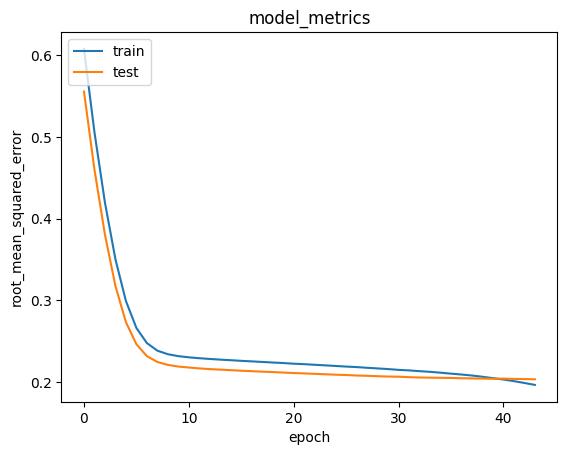

In [40]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [41]:
# Menampilkan metrik selama pelatihan
train_rmse = history.history['root_mean_squared_error']
val_rmse = history.history['val_root_mean_squared_error']

# Menampilkan hasil metrik
print("RMSE pada Data Pelatihan: ", train_rmse[-1])  # RMSE terakhir pada pelatihan
print("RMSE pada Data Validasi: ", val_rmse[-1])    # RMSE terakhir pada validasi


RMSE pada Data Pelatihan:  0.19660934805870056
RMSE pada Data Validasi:  0.2035110741853714


In [42]:
def make_recommendation(model, user_id, num_recommendations=10):
    # Memastikan bahwa user_id sudah dalam bentuk terkode
    user_encoded = user_to_user_encoded.get(user_id)
    if user_encoded is None:
        raise ValueError("UserID tidak ditemukan dalam ID pengguna yang terkode.")

    # Mengambil film yang belum pernah ditonton oleh pengguna
    watched_movies = df[df['userId'] == user_id]['movieId'].values
    all_movie_ids = np.array(movie_ids)
    movie_ids_to_predict = np.setdiff1d(all_movie_ids, watched_movies)

    # Melakukan encoding movie ID
    movie_ids_encoded = [movie_to_movie_encoded.get(movie_id) for movie_id in movie_ids_to_predict]

    # Membuat array input untuk prediksi, menggabungkan user dan movie
    user_encoded_array = np.array([user_encoded] * len(movie_ids_encoded))
    movie_ids_encoded_array = np.array(movie_ids_encoded)

    # Gabungkan menjadi satu array dua dimensi
    input_array = np.column_stack((user_encoded_array, movie_ids_encoded_array))

    # Memprediksi rating untuk setiap film yang belum ditonton
    predictions = model.predict(input_array)

    # Mengambil film dengan rating tertinggi
    top_ratings_indices = predictions.flatten().argsort()[-num_recommendations:][::-1]
    recommended_movie_ids_encoded = [movie_ids_encoded_array[x] for x in top_ratings_indices]

    # Mengembalikan ID film yang direkomendasikan
    recommended_movie_ids = [movie_encoded_to_movie.get(movie_encoded) for movie_encoded in recommended_movie_ids_encoded]

    # Menampilkan informasi film yang direkomendasikan
    recommended_movies = df[df['movieId'].isin(recommended_movie_ids)].drop_duplicates(subset='movieId')[['movieId', 'title']]
    return recommended_movies


In [43]:
# Memilih ID pengguna acak
random_user_id = np.random.choice(user_ids)

# Tampilkan film teratas yang dinilai oleh user
top_rated_movies_by_user = df[df['userId'] == random_user_id].sort_values(by='rating', ascending=False).head(5)

# Pilih kolom yang diinginkan: userId, rating, title, genres
#top_rated_movies_user = top_rated_movies_by_user[['userId', 'rating', 'title', 'genres']]

# Menampilkan rekomendasi untuk pengguna acak
recommended_movies = make_recommendation(model, random_user_id, num_recommendations=10)

# Menampilkan top film by user
print(f"Film Teratas yang Dinilai oleh User: {random_user_id}")
display(top_rated_movies_by_user[['userId', 'rating', 'title', 'genres']])

# Menampilkan hasil rekomendasi
print("\n")
print(f"Rekomendasi film untuk User: {random_user_id}")
display(recommended_movies[['title']])



304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Film Teratas yang Dinilai oleh User: 32


,userId,rating,title,genres
4951,32,5.0,Smoke (1995),Comedy|Drama
5014,32,5.0,"Streetcar Named Desire, A (1951)",Drama
4944,32,4.0,Bed of Roses (1996),Drama|Romance
4945,32,4.0,"Crossing Guard, The (1995)",Action|Crime|Drama|Thriller
4952,32,4.0,"To Wong Foo, Thanks for Everything! Julie Newm...",Comedy




Rekomendasi film untuk User: 32


,title
2443,Vertigo (1958)
2503,Heathers (1989)
2576,"Life Less Ordinary, A (1997)"
2912,Empire Records (1995)
69462,The Big Bus (1976)
69489,Victory (a.k.a. Escape to Victory) (1981)
70182,Philomena (2013)
70466,Dad's Army (1971)
87891,"Match Factory Girl, The (Tulitikkutehtaan tytt..."
93643,On the Beach (1959)
